## Ejercicio
Considere el PVI
$$
y'=-y+x
$$
$$
y(0)=1 \hspace{1cm} 
$$
Cuya solución excata es $y(x)=x-1+2e^{-x}$. Encuentre las aproximaciones del problema usando los Métodos de Euler explícito, Euler implícito y de los Trapecios cuando $h=0.1$ y $h=0.2$. Además grafique las aproximaciones junto con la solución exacta para cada $h$. 

### Declaramos las variables

In [17]:
h = 0.1 # Espaciamiento
a = 0 # x_0 
b = 1 # x_10
N = (b-a)/h
print(f"El intervalo es dividido en {N} partes iguales.")

El intervalo es dividido en 10.0 partes iguales.


In [18]:
Rh = [] # Conjunto discreto.
N = int(N) # Convertir el valor de N a un entero.
for i in range(N+1):
    if (i==0):
        continue
    xi = a + i * h
    Rh.append(xi)
print(Rh)

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]


### Desarrollamos el Método de los Trapecios
El **método trapecios** es el siguiente $y_{i+1} = \dfrac{2y_i + h(-y_i+x_i +x_{i+1})}{2+h}$
Se tiene como dato que $y_0=\alpha$ entonces $y_0=1$ 

In [19]:
y_aprox = []
for i in range(N):
    if(i==0):
        y_i = (2*1 + h*(-1 + 0 + Rh[i]))/(2 + h)
        y_aprox.append(y_i)
    else:
        y_i = (2*y_aprox[i-1] + h*(-y_aprox[i-1]+Rh[i-1] + Rh[i]))/(2 + h)
        y_aprox.append(y_i)
print(y_aprox)

[0.9095238095238094, 0.8371882086167799, 0.7812655220818484, 0.7401926152169105, 0.7125552232914905, 0.6970737734542056, 0.6925905569347575, 0.698058122940971, 0.7125287778989737, 0.7351450847657381]


### Calculamos la solución exacta

In [20]:
import math

def funcion(x):
    return x - 1 + 2 * math.exp(-x)

sol_exacta = []

for i in Rh:
    sol = funcion(i)
    sol_exacta.append(sol)
print(sol_exacta)

[0.909674836071919, 0.8374615061559636, 0.7816364413634358, 0.7406400920712787, 0.7130613194252668, 0.6976232721880529, 0.693170607582819, 0.6986579282344432, 0.7131393194811982, 0.7357588823428847]


### Graficamos los resultados

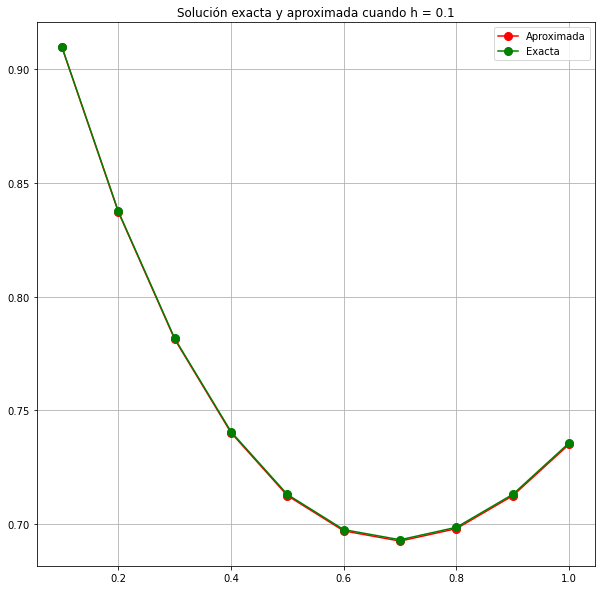

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(Rh, y_aprox, "ro-", markersize=8, label="Aproximada")
plt.plot(Rh, sol_exacta, "go-", markersize=8, label="Exacta")
plt.title("Solución exacta y aproximada cuando h = 0.1")
plt.legend(loc="upper right")
plt.savefig("imagen_trapecio_h_0_1.pdf")
plt.grid()
plt.show()

### Calculamos el error absoluto

In [22]:
E_abs = []

for i in range(N):
    s = abs(sol_exacta[i]-y_aprox[i])
    E_abs.append(s)
    
print(E_abs)

[0.0001510265481096118, 0.00027329753918370336, 0.0003709192815873896, 0.0004474768543681895, 0.0005060961337763903, 0.0005494987338472423, 0.0005800506480615475, 0.0005998052934721443, 0.0006105415822245108, 0.0006137975771465243]


### Creamos un DataFrame y luego creamos una tabla con los resultados obtenidos

In [23]:
import pandas as pd
from tabulate import tabulate

datos = {
    'Rh' : Rh,
    'S. Aprox' : y_aprox,
    'S. Exact' : sol_exacta,
    'Error Abs' : E_abs
}

print(tabulate(datos, headers=["Rh", "Sol. Aprox", "Sol. Exacta","Error Abs"], tablefmt='fancy_grid',stralign='center'))

╒══════╤══════════════╤═══════════════╤═════════════╕
│   Rh │   Sol. Aprox │   Sol. Exacta │   Error Abs │
╞══════╪══════════════╪═══════════════╪═════════════╡
│  0.1 │     0.909524 │      0.909675 │ 0.000151027 │
├──────┼──────────────┼───────────────┼─────────────┤
│  0.2 │     0.837188 │      0.837462 │ 0.000273298 │
├──────┼──────────────┼───────────────┼─────────────┤
│  0.3 │     0.781266 │      0.781636 │ 0.000370919 │
├──────┼──────────────┼───────────────┼─────────────┤
│  0.4 │     0.740193 │      0.74064  │ 0.000447477 │
├──────┼──────────────┼───────────────┼─────────────┤
│  0.5 │     0.712555 │      0.713061 │ 0.000506096 │
├──────┼──────────────┼───────────────┼─────────────┤
│  0.6 │     0.697074 │      0.697623 │ 0.000549499 │
├──────┼──────────────┼───────────────┼─────────────┤
│  0.7 │     0.692591 │      0.693171 │ 0.000580051 │
├──────┼──────────────┼───────────────┼─────────────┤
│  0.8 │     0.698058 │      0.698658 │ 0.000599805 │
├──────┼──────────────┼─────